In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("enso_index.csv")
df

,year,january,february,march,april,may,june,july,august,september,october,november,december,avg
0,1958,1.54,1.40,0.99,0.31,0.32,0.30,0.04,0.24,-0.31,-0.03,0.05,0.30,0.0675
1,1959,0.43,0.50,0.26,0.27,-0.01,-0.33,-0.28,-0.41,-0.53,0.11,-0.17,-0.05,-0.3875
2,1960,0.02,-0.24,-0.08,0.01,0.05,-0.20,-0.25,0.00,0.03,-0.07,-0.38,0.02,-0.1050
3,1961,-0.15,0.04,-0.10,0.13,-0.01,0.10,-0.32,-0.25,-0.52,-0.71,-0.19,-0.29,-0.2475
4,1962,-0.25,-0.16,-0.41,-0.32,-0.42,-0.22,-0.30,-0.13,-0.56,-0.33,-0.43,-0.49,-0.3025
5,1963,-0.32,-0.26,-0.06,-0.06,0.00,0.12,0.72,0.90,0.65,0.84,0.75,1.05,0.5975
6,1964,0.76,0.55,-0.16,-0.53,-0.74,-0.88,-0.65,-0.76,-0.93,-1.00,-1.10,-1.07,-0.8050
7,1965,-0.57,-0.36,-0.34,-0.09,0.19,0.45,0.81,1.25,1.26,1.61,1.54,1.45,0.9425
8,1966,1.13,0.83,0.83,0.54,-0.06,0.14,0.23,-0.10,-0.05,-0.05,-0.37,-0.26,0.0550
9,1967,-0.55,-0.56,-0.47,-0.53,-0.24,-0.12,-0.10,-0.31,-0.59,-0.38,-0.34,-0.35,-0.2800


In [3]:
df_month = pd.read_csv("mutual_corr.csv")
df_month

,July_4,May_5,July,April_8,April_2,October_5,April_3,June_3,November_4,September_2,...,April_5,April_7,October,April_4,November_3,February,March,August,September,February_2
0,-0.035646,-0.297254,0.116877,-0.752232,0.467579,0.015344,-0.128409,-0.041748,0.494299,-0.313941,...,-0.471040,-0.740667,-0.468894,0.747432,0.753646,-0.524107,-0.535243,-0.233522,-0.719241,0.454346
1,-0.035646,0.289295,0.116877,-0.507175,0.775496,0.015344,0.076556,-0.041748,0.494299,-0.313941,...,-0.339469,-0.344348,-0.468894,0.917408,0.753646,-0.034594,0.142829,-0.233522,-0.719241,-0.265130
2,-0.026609,0.332815,-0.525955,-0.538692,0.330257,0.084460,-0.179884,-0.036510,0.540119,-0.410891,...,-0.708604,-0.389613,-0.070561,0.793662,0.632909,-0.734775,0.060865,-0.393912,-0.304767,0.217671
3,-0.050294,-0.072422,-0.276801,-0.375539,0.499516,0.107016,-0.094489,0.200410,0.470386,-0.306994,...,-0.468455,-0.150195,-0.450786,1.317336,0.635144,-0.339573,-0.130424,-0.229269,-0.458375,0.087787
4,-0.240937,0.392898,-0.017141,-0.531919,-0.011843,-0.324095,0.035687,0.171829,0.652327,-0.468445,...,-0.195690,-0.335668,-0.660210,0.662500,0.584083,-0.369744,-0.099894,-0.695059,-0.280599,0.151158
5,-0.673967,-0.032447,0.584025,-0.546058,-0.034051,0.115252,-0.173557,0.280658,0.586573,-0.120420,...,-0.217833,-0.798253,-0.721418,1.070260,0.167864,-0.550118,-0.182152,-0.489441,-0.313486,0.146134
6,-0.101286,0.302982,0.393098,-0.596641,-0.170367,0.175994,0.003694,0.244333,0.776653,-0.209485,...,-0.467695,-0.333764,-0.418519,1.323657,0.401871,-0.823182,-0.029438,-0.153444,-0.840137,-0.435853
7,0.113929,-0.081629,0.234448,-0.125865,0.007114,0.079383,-0.082095,0.102267,0.525716,0.079061,...,-0.091785,-0.743215,-0.337845,0.816912,0.766847,-0.406494,0.399040,-0.248396,-0.194485,-0.411154
8,0.007671,0.329287,0.088683,-0.244421,0.747785,-0.114815,-0.060377,0.204964,0.905153,-0.075762,...,0.062279,-0.584938,-0.515347,0.355462,0.578946,-0.496390,-0.096661,-0.329369,-0.442612,-0.181780
9,-0.075417,0.353181,0.031045,-0.429741,0.263944,-0.074636,-0.193876,-0.437410,0.363044,-0.209571,...,-0.066035,-0.846965,-0.422913,0.865205,0.301831,-0.395232,-0.173918,-0.516984,-0.147705,0.040095


In [4]:
scaler = StandardScaler()

In [5]:
x_train = df_month.iloc[:42, :10]
x_train = scaler.fit_transform(x_train)
x_train

array([[ 6.19362128e-01, -1.72256897e+00, -2.84325545e-01,
        -2.01425422e+00,  3.22546509e-01, -1.00524025e+00,
        -6.96083435e-01,  3.70542446e-01,  8.79202224e-01,
        -1.63413258e+00],
       [ 6.19362128e-01,  1.00165398e+00, -2.84325545e-01,
        -9.85022860e-01,  1.38085309e+00, -1.00524025e+00,
         7.54595543e-01,  3.70542446e-01,  8.79202224e-01,
        -1.63413258e+00],
       [ 6.57336519e-01,  1.20378620e+00, -2.72172433e+00,
        -1.11739027e+00, -1.49428162e-01, -7.78811316e-01,
        -1.06040142e+00,  3.89974154e-01,  1.03864771e+00,
        -1.88163771e+00],
       [ 5.57811382e-01, -6.78339142e-01, -1.77701826e+00,
        -4.32154788e-01,  4.32311435e-01, -7.04914324e-01,
        -4.56007859e-01,  1.26895281e+00,  7.95988499e-01,
        -1.61639706e+00],
       [-2.43297374e-01,  1.48284144e+00, -7.92474712e-01,
        -1.08894493e+00, -1.32522023e+00, -2.11726674e+00,
         4.65338899e-01,  1.16291632e+00,  1.42911370e+00,
        -2.

In [6]:
y_train = []
target_variables = ['avg', 'june', 'july', 'august', 'september']
for i in target_variables:
    y_tr= df.iloc[:42][i]
    y_train.append(y_tr)
    

In [7]:
y_train

[0     0.0675
 1    -0.3875
 2    -0.1050
 3    -0.2475
 4    -0.3025
 5     0.5975
 6    -0.8050
 7     0.9425
 8     0.0550
 9    -0.2800
 10    0.2200
 11    0.3375
 12   -0.7525
 13   -0.7050
 14    0.9950
 15   -1.1525
 16   -0.5050
 17   -1.2725
 18    0.2575
 19    0.3750
 20   -0.5375
 21    0.1325
 22    0.0100
 23   -0.2075
 24    0.9700
 25   -0.0300
 26   -0.5125
 27   -0.6075
 28    0.2275
 29    1.3975
 30   -1.4425
 31   -0.5175
 32    0.1100
 33    0.4800
 34    0.1275
 35    0.3475
 36    0.3375
 37   -0.2100
 38   -0.2250
 39    1.6975
 40   -0.6925
 41   -0.9025
 Name: avg, dtype: float64,
 0     0.30
 1    -0.33
 2    -0.20
 3     0.10
 4    -0.22
 5     0.12
 6    -0.88
 7     0.45
 8     0.14
 9    -0.12
 10    0.19
 11    0.26
 12   -0.30
 13   -0.78
 14    0.66
 15   -0.86
 16   -0.70
 17   -1.25
 18    0.00
 19    0.36
 20   -0.45
 21    0.04
 22    0.37
 23   -0.15
 24    0.92
 25    0.62
 26   -0.90
 27   -0.76
 28   -0.08
 29    1.24
 30   -1.46
 31   -0.64


In [8]:
x_test = df_month.iloc[43:, :10]
x_test = scaler.fit_transform(x_test)
x_test

array([[-1.87616942e-01, -8.26992879e-02, -1.24748269e+00,
         4.66967512e-01, -9.98279173e-02, -7.99553785e-04,
         1.75649501e-02, -7.49518632e-02,  8.94785115e-01,
         6.87216605e-01],
       [-1.09250919e+00, -1.40790969e+00,  3.27544864e-01,
        -3.06291619e-01,  3.18781632e-01,  1.44653626e+00,
         4.23951570e-02, -3.23710859e-02, -1.95008206e+00,
        -7.45427821e-01],
       [ 4.52693685e-01, -9.27913142e-01,  7.05588723e-01,
        -3.66822860e-01,  5.87459726e-02, -2.78744500e-01,
        -2.77178737e-01, -2.44565772e-01,  2.77715515e-01,
         1.19933152e+00],
       [-6.60534474e-01,  8.29987180e-01, -4.43635461e-01,
        -3.82578964e-02,  9.87209987e-01, -4.54708396e-01,
        -1.89366750e-01,  2.73566873e-01,  7.25749785e-01,
         1.71700187e+00],
       [-5.99165118e-02, -1.53291905e+00, -1.39634812e+00,
         3.64285604e-01,  1.02398018e+00, -6.60291700e-01,
         8.96600634e-01,  8.34756467e-01,  6.87837467e-01,
         2.

In [9]:
y_test = []
target_variables = ['avg', 'june', 'july', 'august', 'september']
for i in target_variables:
    y_ts= df.iloc[43:][i] 
    y_test.append(y_ts)

In [10]:
y_test

[43   -0.1125
 44    0.6925
 45    0.0375
 46    0.4700
 47    0.0225
 48    0.2800
 49   -0.5350
 50   -0.2000
 51    0.6200
 52   -1.1000
 53   -0.4750
 54    0.4200
 55   -0.2475
 56    0.2800
 57    1.6800
 58   -0.2825
 Name: avg, dtype: float64,
 43   -0.11
 44    0.68
 45   -0.19
 46    0.14
 47    0.22
 48    0.09
 49   -0.16
 50   -0.44
 51    0.49
 52   -0.62
 53   -0.25
 54    0.14
 55   -0.33
 56    0.48
 57    1.28
 58    0.06
 Name: june, dtype: float64,
 43    0.01
 44    0.57
 45    0.14
 46    0.41
 47   -0.01
 48    0.03
 49   -0.37
 50   -0.04
 51    0.69
 52   -0.89
 53   -0.23
 54    0.44
 55   -0.28
 56    0.13
 57    1.56
 58   -0.25
 Name: july, dtype: float64,
 43   -0.07
 44    0.70
 45    0.05
 46    0.66
 47   -0.04
 48    0.37
 49   -0.57
 50   -0.04
 51    0.62
 52   -1.33
 53   -0.66
 54    0.66
 55   -0.29
 56    0.14
 57    1.87
 58   -0.48
 Name: august, dtype: float64,
 43   -0.28
 44    0.82
 45    0.15
 46    0.67
 47   -0.08
 48    0.63
 49   -1.04

# Bagging Regressor:

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

def perform_grid_search(x_train, y_train, x_test):
    param_grid = {
        'base_estimator__max_depth': range(1, 5),
        'n_estimators': range(1, 51)
    }

    # Create the BaggingRegressor with DecisionTreeRegressor as the base estimator
    bagging_reg = BaggingRegressor(base_estimator=DecisionTreeRegressor(), oob_score=True, random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(bagging_reg, param_grid, cv=2, scoring='r2')

    # Fit the grid search to the data
    grid_search.fit(x_train, y_train)

    # Get the best parameters and the corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_max_depth = best_params['base_estimator__max_depth']
    best_n_estimators = best_params['n_estimators']

    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")

    # Use the best parameters to train a BaggingRegressor and make predictions
    regressor = BaggingRegressor(
        base_estimator=DecisionTreeRegressor(max_depth=best_max_depth),
        n_estimators=best_n_estimators,
        oob_score=True,
        random_state=0)
    
    regressor.fit(x_train, y_train)
    score = regressor.score(x_train, y_train)
    y_pred = regressor.predict(x_test)

    return best_params, best_score, score, y_pred


In [12]:

y_pred_list = []

for target_variable in y_train:
    best_params, best_score, model_score, y_pred = perform_grid_search(x_train, target_variable, x_test)
    y_pred_list.append(y_pred)



Best Parameters: {'base_estimator__max_depth': 1, 'n_estimators': 12}
Best Score: 0.10286319333786659
Best Parameters: {'base_estimator__max_depth': 1, 'n_estimators': 31}
Best Score: 0.11345133251833162
Best Parameters: {'base_estimator__max_depth': 1, 'n_estimators': 32}
Best Score: -0.03182270348713545
Best Parameters: {'base_estimator__max_depth': 1, 'n_estimators': 13}
Best Score: 0.08338868620632445
Best Parameters: {'base_estimator__max_depth': 1, 'n_estimators': 33}
Best Score: -0.12499990326420701


In [13]:
y_pred_list

[array([ 0.10552404,  0.26846791,  0.16951214,  0.1022382 ,  0.0481421 ,
         0.0481421 , -0.46534929, -0.38224812, -0.03495907, -0.03495907,
        -0.03495907,  0.10552404,  0.04002605, -0.03495907,  0.18711531,
         0.18711531]),
 array([ 0.22463483,  0.335189  ,  0.25671846, -0.18766893,  0.25671846,
         0.26085603, -0.46038681, -0.07103208, -0.22389013, -0.18766893,
        -0.22389013,  0.25671846, -0.22389013, -0.18766893,  0.25671846,
         0.25671846]),
 array([ 0.0617412 ,  0.34125713,  0.0343456 ,  0.09571427,  0.0343456 ,
         0.12142994, -0.36495599, -0.29635535, -0.14451531, -0.09311177,
        -0.11711971,  0.0343456 , -0.09110236, -0.05743097,  0.11515414,
         0.08775855]),
 array([ 0.00829609,  0.2379722 ,  0.09854745,  0.08581651, -0.06483716,
         0.00829609, -0.37730947, -0.38088228,  0.11043756, -0.06126435,
        -0.06126435,  0.01661338,  0.16748152, -0.06126435,  0.31017521,
         0.23704196]),
 array([-0.10453501,  0.39876932

In [14]:
correlation_list = []
for i in range(5):
    corr_bag_reg_mean = np.corrcoef(y_pred_list[i], y_test[i])
    correlation_list.append(corr_bag_reg_mean[0][1])

In [15]:
correlation_list

[0.46438847990341386,
 0.38151311980289593,
 0.43778054025093294,
 0.48945729951391465,
 0.5862173943283604]

In [16]:
months = ['jjas-mean','june','july','august','september']

In [17]:
import os

output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+sst/10 predictors/kendall/coorelation_plots/bagging_regressor'

for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=80)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'slp+sst (2001-2016) 10p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()

    # Save the plot
    plot_filename = f'10p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)


Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+sst/10 predictors/kendall/coorelation_plots/bagging_regressor


In [18]:
output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+sst/10 predictors/kendall/comparison plots/bagging_regressor'

for i in range(5):
    plt.plot(df['year'][43:], y_test[i], label='Actual', color='blue', marker='o', linestyle='-')
    plt.plot(df['year'][43:], y_pred_list[i], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)

    
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Enso Indices', fontsize=12)
    plt.title(f'slp+sst Predicted vs Actual 10p {months[i]}', fontsize=14)
    plt.legend(loc='upper left')


    
    plot_filename = f'10p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)



Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+sst/10 predictors/kendall/comparison plots/bagging_regressor


# Random Forest

In [19]:


def perform_random_forest_grid_search(x_train, y_train, x_test):
    # Define the parameter grid
    param_grid = {
        'n_estimators': range(1, 51),
        'max_depth': range(1, 5),
    }

    # Create the RandomForestRegressor
    random_forest_reg = RandomForestRegressor(random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(random_forest_reg, param_grid, cv=2, scoring='r2')

    # Fit the grid search to the data
    grid_search.fit(x_train, y_train)

    # Get the best parameters and the corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    # Save the best values into separate variables
    best_max_depth = best_params['max_depth']
    best_n_estimators = best_params['n_estimators']

    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")
    print(f"Best max_depth: {best_max_depth}")
    print(f"Best n_estimators: {best_n_estimators}")

    # Use the best parameters to train a RandomForestRegressor and make predictions
    RF = RandomForestRegressor(
        n_estimators=best_n_estimators,
        max_depth=best_max_depth,
        random_state=0)

    RF.fit(x_train, y_train)
    score = RF.score(x_train, y_train)
    y_pred_rf = RF.predict(x_test)

    return best_params, best_score, score, y_pred_rf


In [20]:

y_pred_list_rf = []

for target_variable in y_train:
    best_params, best_score, model_score, y_pred = perform_grid_search(x_train, target_variable, x_test)
    y_pred_list_rf.append(y_pred)


Best Parameters: {'base_estimator__max_depth': 1, 'n_estimators': 12}
Best Score: 0.10286319333786659
Best Parameters: {'base_estimator__max_depth': 1, 'n_estimators': 31}
Best Score: 0.11345133251833162
Best Parameters: {'base_estimator__max_depth': 1, 'n_estimators': 32}
Best Score: -0.03182270348713545
Best Parameters: {'base_estimator__max_depth': 1, 'n_estimators': 13}
Best Score: 0.08338868620632445
Best Parameters: {'base_estimator__max_depth': 1, 'n_estimators': 33}
Best Score: -0.12499990326420701


In [21]:
y_pred_list_rf

[array([ 0.10552404,  0.26846791,  0.16951214,  0.1022382 ,  0.0481421 ,
         0.0481421 , -0.46534929, -0.38224812, -0.03495907, -0.03495907,
        -0.03495907,  0.10552404,  0.04002605, -0.03495907,  0.18711531,
         0.18711531]),
 array([ 0.22463483,  0.335189  ,  0.25671846, -0.18766893,  0.25671846,
         0.26085603, -0.46038681, -0.07103208, -0.22389013, -0.18766893,
        -0.22389013,  0.25671846, -0.22389013, -0.18766893,  0.25671846,
         0.25671846]),
 array([ 0.0617412 ,  0.34125713,  0.0343456 ,  0.09571427,  0.0343456 ,
         0.12142994, -0.36495599, -0.29635535, -0.14451531, -0.09311177,
        -0.11711971,  0.0343456 , -0.09110236, -0.05743097,  0.11515414,
         0.08775855]),
 array([ 0.00829609,  0.2379722 ,  0.09854745,  0.08581651, -0.06483716,
         0.00829609, -0.37730947, -0.38088228,  0.11043756, -0.06126435,
        -0.06126435,  0.01661338,  0.16748152, -0.06126435,  0.31017521,
         0.23704196]),
 array([-0.10453501,  0.39876932

In [22]:
correlation_list_rf = []
for i in range(5):
    corr_bag_reg_mean = np.corrcoef(y_pred_list[i], y_test[i])
    correlation_list_rf.append(corr_bag_reg_mean[0][1])

In [23]:
correlation_list_rf

[0.46438847990341386,
 0.38151311980289593,
 0.43778054025093294,
 0.48945729951391465,
 0.5862173943283604]

In [24]:
import os

output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+sst/10 predictors/kendall/coorelation_plots/randomforest'

for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=80)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'slp+sst (2001-2016) 10p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()

    # Save the plot
    plot_filename = f'10_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook
    
print("Plots saved in:", output_directory)

Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+sst/10 predictors/kendall/coorelation_plots/randomforest


In [25]:
output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+sst/10 predictors/kendall/comparison plots/randomforest'

for i in range(5):
    plt.plot(df['year'][43:], y_test[i], label='Actual', color='blue', marker='o', linestyle='-')
    plt.plot(df['year'][43:], y_pred_list_rf[i], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)

    
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Enso Indices', fontsize=12)
    plt.title(f'slp+sst Predicted vs Actual 10p {months[i]}', fontsize=14)
    plt.legend(loc='upper left')


    
    plot_filename = f'10p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)



Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+sst/10 predictors/kendall/comparison plots/randomforest


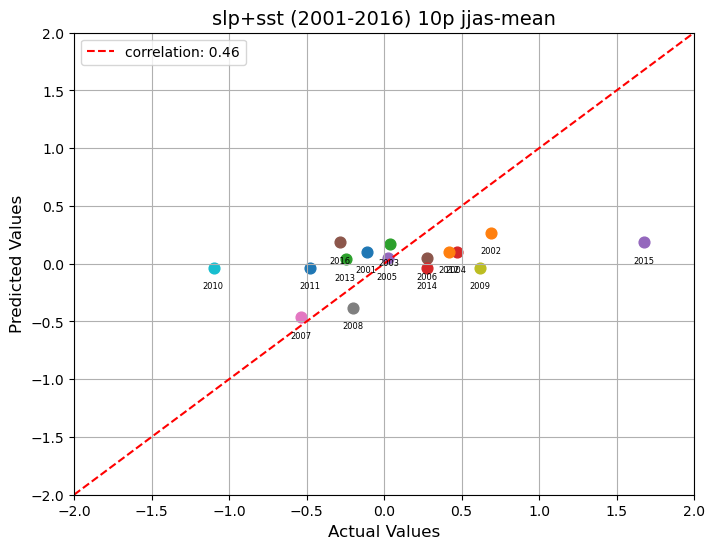

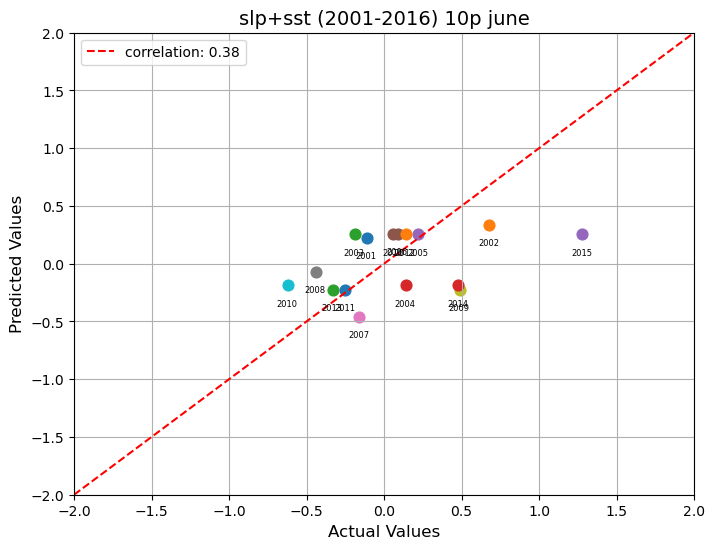

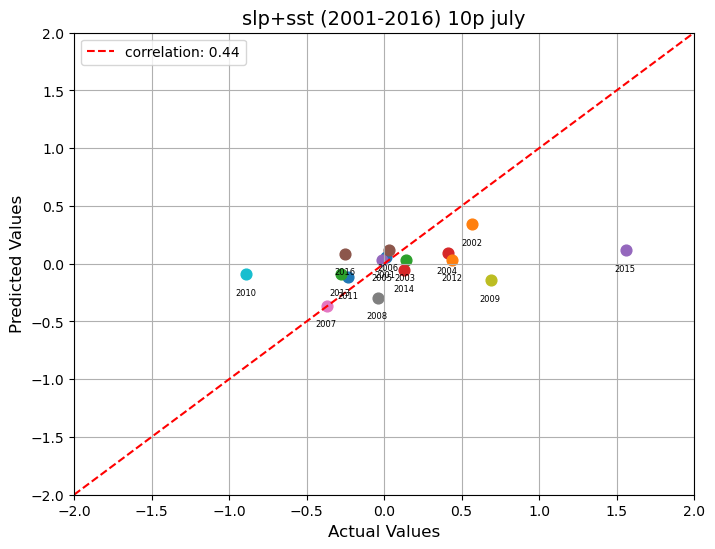

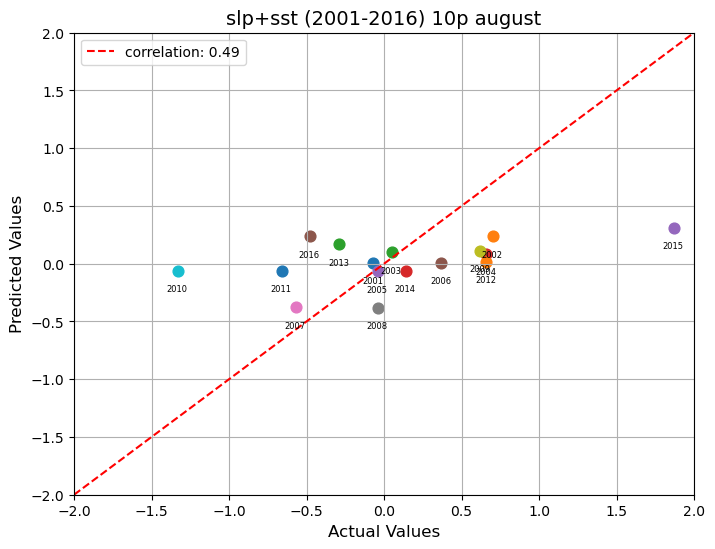

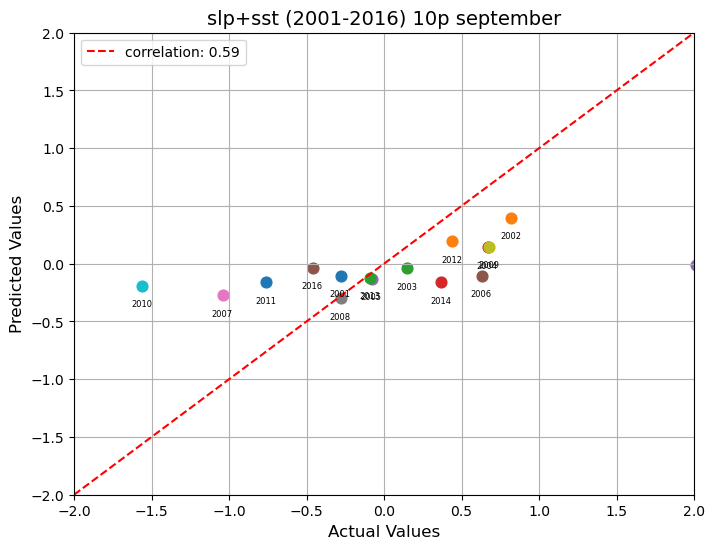

In [26]:
for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=60)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=6)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'slp+sst (2001-2016) 10p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()
    plt.show